In [1]:
from cw_analysis import calculate_ppc, process_multiple_ppc, make_array, normal_distribution_tests, find_best_mean, find_best_median, top_n_medians

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

import pandas as pd
from matplotlib import style
from matplotlib.pyplot import cm
import matplotlib.collections as mcoll

import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import statistics

<Figure size 1080x864 with 0 Axes>

In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# 3 Day Trials

## All results

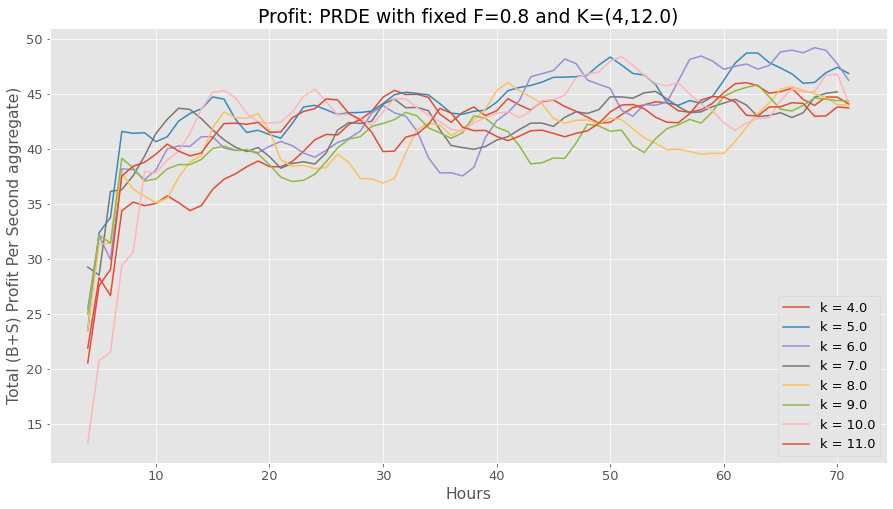

In [3]:
all_sma_set_f_3d = process_multiple_ppc('unit_elastic/set_f0.8_3d/set_f_%d',4,12,1,
                                        'unit_elastic/set_f0.8_3d/figures/total_all_k.png', 
                                        'Profit: PRDE with fixed F=0.8 and K=')

In [4]:
all_sma_set_f_3d = make_array(all_sma_set_f_3d)

### Distribution Analysis 

In [5]:
# normal_distribution_tests(all_sma_set_f_3d, False)

### Mean Analysis 


[38.98708785555555, 41.621947469444436, 40.30814895555555, 39.42056858591549, 38.378450177777786, 38.40630349166665, 39.986133074999984, 39.19055628611112]
5 41.621947469444436


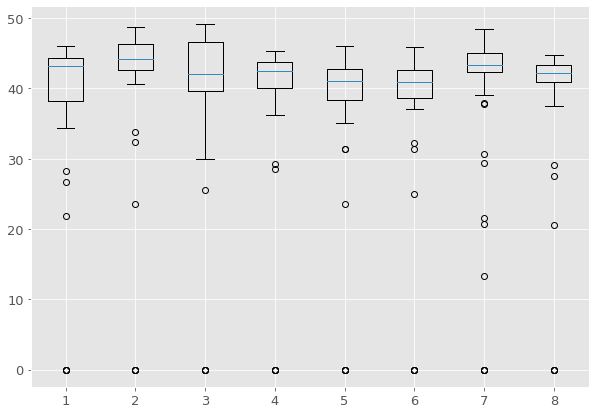

In [24]:
find_best_mean(all_sma_set_f_3d, 4)

fig = plt.figure(figsize =(10, 7))
plt.boxplot(all_sma_set_f_3d)
plt.show()

5 44.185350499999984


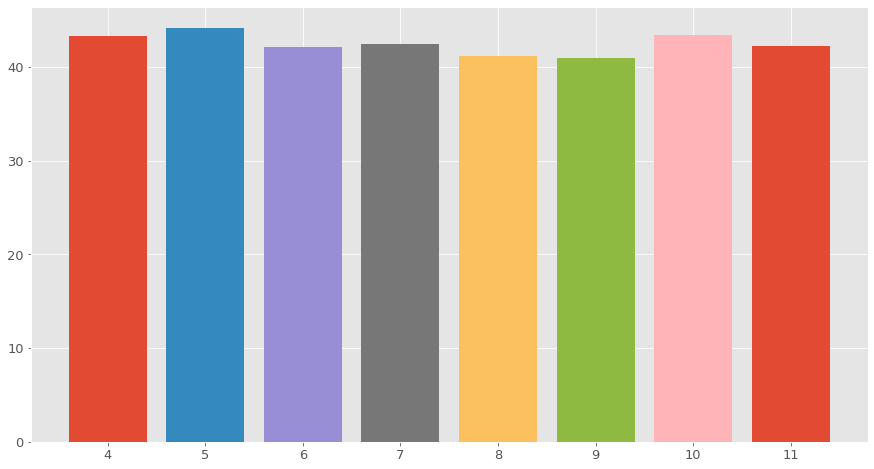

In [7]:
medians_3d = find_best_median(all_sma_set_f_3d, 4)

In [9]:
top_n_medians(medians_3d, 3)

1 44.185350499999984
6 43.36971879999998
0 43.254682599999995


[[1, 44.185350499999984], [6, 43.36971879999998], [0, 43.254682599999995]]

### ANOVA 

In [10]:
# from scipy.stats import f_oneway
# f_oneway(all_sma_set_f_3d[0], all_sma_set_f_3d[1], all_sma_set_f_3d[2], all_sma_set_f_3d[3], all_sma_set_f_3d[4] , all_sma_set_f_3d[5],  all_sma_set_f_3d[6], all_sma_set_f_3d[7])

### Kruskal-Wallis 

In [12]:
k, p = stats.kruskal(all_sma_set_f_3d[0], all_sma_set_f_3d[1], all_sma_set_f_3d[2], all_sma_set_f_3d[3], all_sma_set_f_3d[4] , all_sma_set_f_3d[5],  all_sma_set_f_3d[6], all_sma_set_f_3d[7])
print(format(p, '.22f'))

0.0000000000866754593750


In [16]:
# !pip install scikit_posthocs
import scikit_posthocs as sp

data = [all_sma_set_f_3d[1], all_sma_set_f_3d[6], all_sma_set_f_3d[0]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.133855,0.000534
2,0.133855,1.000000,0.245470
3,0.000534,0.245470,1.000000


### Mann-whitney 

In [18]:
from scipy.stats import norm
from scipy.stats import mannwhitneyu

res, p = mannwhitneyu(all_sma_set_f_3d[1], all_sma_set_f_3d[0])
print(format(p, '.11f'))

0.00009269649


## Individual Trials 

skewness of normal distribution (should be 0): -3.254279974369631
shapiro of normal distribution (p should be > 0.5):0.000000000000019860291728779171
median of data: 44.185350



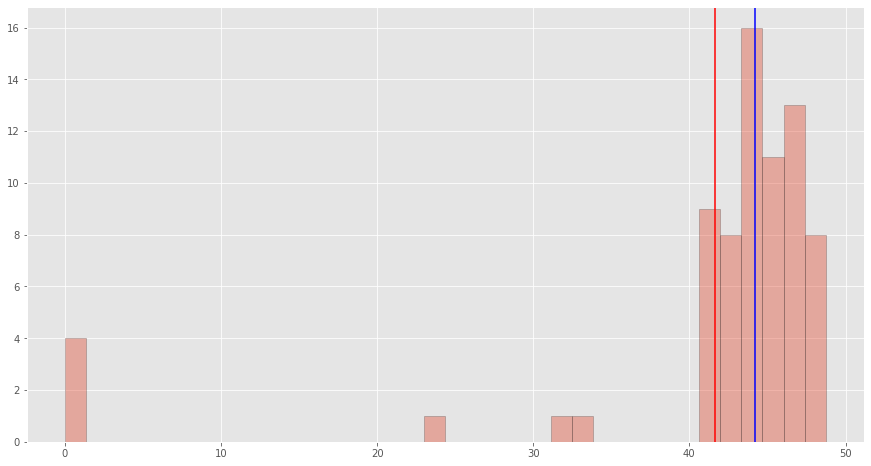

In [47]:
normal_distribution_tests(all_sma_set_f_3d[1:2], True)

# 5 day trials

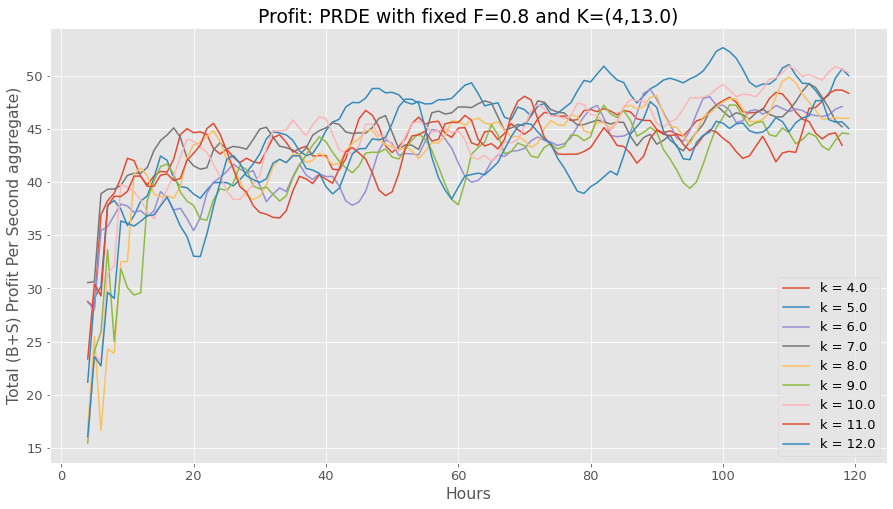

In [19]:
all_sma_set_f_5d = process_multiple_ppc('unit_elastic/set_f0.8_5d/set_f_%d_trail',4,13,1,
                                        'unit_elastic/set_f0.8_5d/figures/total_all_k.png', 
                                        'Profit: PRDE with fixed F=0.8 and K=')

In [20]:
all_sma_set_f_5d = make_array(all_sma_set_f_5d)

In [21]:
# normal_distribution_tests(all_sma_set_f_5d, False)

[42.69967226890758, 44.26719678333335, 40.97525004537814, 43.07000373613445, 41.670977055, 40.020067736666654, 42.703186661666656, 41.00063520166669, 40.07589549833334]
5 44.26719678333335


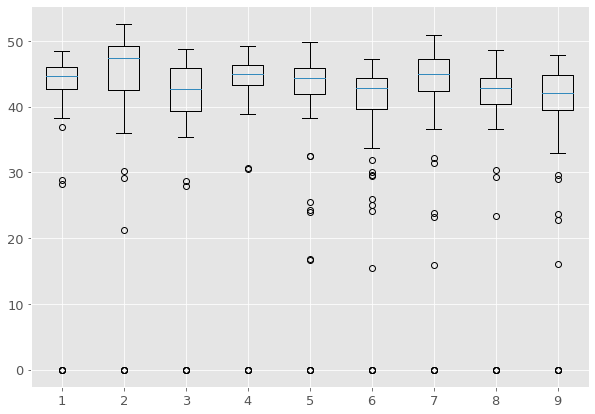

In [22]:
find_best_mean(all_sma_set_f_5d, 4)

fig = plt.figure(figsize =(10, 7))
plt.boxplot(all_sma_set_f_5d)
plt.show()

5 47.43202160000001


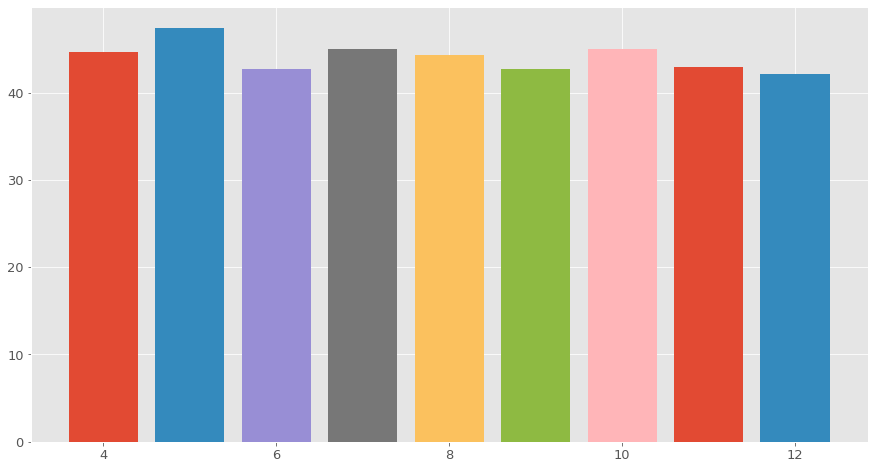

In [23]:
medians_5d = find_best_median(all_sma_set_f_5d, 4)

In [24]:
top_n_medians(medians_5d, 3)

1 47.43202160000001
3 44.967672199999996
6 44.952246199999976


[[1, 47.43202160000001], [3, 44.967672199999996], [6, 44.952246199999976]]

In [53]:
k, p = stats.kruskal(all_sma_set_f_5d[0], all_sma_set_f_5d[1], all_sma_set_f_5d[2], all_sma_set_f_5d[3], all_sma_set_f_5d[4] , all_sma_set_f_5d[5],  all_sma_set_f_5d[6], all_sma_set_f_5d[7], all_sma_set_f_5d[8])
# print(p)
print(format(p, '.30f'))

0.000000000000000000000000109981


In [25]:
data = [all_sma_set_f_3d[1], all_sma_set_f_3d[3], all_sma_set_f_3d[6]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000007,0.146746
2,0.000007,1.000000,0.016595
3,0.146746,0.016595,1.000000
